<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [ ]:
# addprocs(7)

In [ ]:
# @everywhere push!(LOAD_PATH, ".")
# @everywhere using RobustOptimization, ScikitLearn
# using PyPlot, Ipopt
# @everywhere @sk_import model_selection: train_test_split
# # @everywhere @sk_import metrics: mean_squared_error
# @everywhere @sk_import metrics: r2_score
# @everywhere nbfeatures = 13
# solver = IpoptSolver(print_level = 2)

In [1]:
push!(LOAD_PATH, ".")
using RobustOptimization 
using ScikitLearn
using PyPlot, Ipopt
 @sk_import model_selection: train_test_split
# @everywhere @sk_import metrics: mean_squared_error
 @sk_import metrics: r2_score
nbfeatures = 13
solver = IpoptSolver(print_level = 2)

INFO: Recompiling stale cache file /home/henri/.julia/lib/v0.6/RobustOptimization.ji for module RobustOptimization.


Ipopt.IpoptSolver(Any[(:print_level, 2)])

In [ ]:
# @everywhere path_train = "datasets/housing_scale"
# solver = IpoptSolver(print_level = 2)
# @everywhere  data = read_data_libsvm(path_train, nbfeatures)
# @everywhere  xtr, xte, ytr, yte = train_test_split(data[:,1:end-1], data[:,end], train_size = 0.8)  
# # @everywhere  df_train = hcat(xtr, ytr)
# @everywhere  df_train = data
# @everywhere  df_test = hcat(xte, yte);

In [2]:
@everywhere df_train, df_test = create_data("housing_scale", nbfeatures, 0.1, train_test_split)
# df_train, df_test = create_data("housing_scale", nbfeatures, 0.7, train_test_split)

In [3]:
# ambiguity = "KLdivergence"
N = size(df_train)[1]
ϵ = 0.1
verbosity = 10
itmax = 1000
sample = 10

ambiguity = "wasserstein"

robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
# α = 1/norm(robustModel.descent_direction)
α = 1.0
projParams = ProjParams(Int(1e6), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
optParams = OptParams(itmax, 1e-7, α, verbosity = verbosity);

In [4]:
x1 = init_proj(df_train, robustModel, projParams);

In [16]:
@time xalg, yalg, dm, mem, mini = run_algo(x1, df_train, robustModel, optParams, projParams)

100 0.0 200 0.0 300 0.0 400 0.0 500 0.0 600 0.0 700 0.0 800 0.0 900 0.0 1000 0.0 1100 0.0 1200 0.0 1300 0.0 1400 0.0 1500 0.0 1600 0.0 1700 0.0 1800 0.0 1900 0.0 2000 0.0 2100 0.0 2200 0.0 2300 0.0 2400 0.0 2500 0.0 2600 0.0 2700 0.0 2800 0.0 2900 0.0 3000 0.0 3100 0.0 3200 0.0 3300 0.0 3400 0.0 3500 0.0 3600 0.0 3700 0.0 3800 0.0 3900 0.0 4000 0.0 4100 0.0 4200 0.0 4300 0.0 4400 0.0 4500 0.0 4600 0.0 4700 0.0 4800 0.0 4900 0.0 5000 0.0 5100 0.0 5200 0.0 5300 0.0 5400 0.0 5500 0.0 5600 0.0 5700 0.0 5800 0.0 5900 0.0 6000 0.0 6100 0.0 6200 0.0 6300 0.0 6400 0.0 6500 0.0 6600 0.0 6700 0.0 6800 0.0 6900 0.0 7000 0.0 7100 0.0 7200 0.0 7300 0.0 7400 0.0 7500 0.0 7600 0.0 7700 0.0 7800 0.0 7900 0.0 8000 0.0 8100 0.0 8200 0.0 8300 0.0 8400 0.0 8500 0.0 8600 0.0 8700 0.0 8800 0.0 8900 0.0 9000 0.0 9100 0.0 9200 0.0 9300 0.0 9400 0.0 9500 0.0 9600 0.0 9700 0.0 9800 0.0 9900 0.0 10000 0.0 10100 0.0 10200 0.0 10300 0.0 10400 0.0 10500 0.0 10600 0.0 10700 0.0 10800 0.0 10900 0.0 11000 0.0 11100 0.

LoadError: [91mInterruptException:[39m

In [ ]:
28.401273 seconds (225.45 M allocations: 65.526 GiB, 24.38% gc time)


In [5]:
xalg, yalg, dm, mem, mini = run_algo(x1, df_train, robustModel, optParams, projParams)
xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
xrobust2 = getsolution(mem, ambiguity, nbfeatures)
y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
y_true = df_test[:,end]
println("1 = ", r2_score(y_true, y_pred1))
println("1 = ", r2_score(y_true, y_pred2))

10 0.0 20 0.0 30 0.0 40 0.0 50 0.0 60 0.0 70 0.0 80 0.0 90 0.0 100 0.0 110 0.0 120 0.0 130 0.0 140 0.0 150 0.0 160 0.0 170 0.0 180 0.0 190 0.0 200 0.0 210 0.0 220 0.0 230 0.0 240 0.0 250 0.0 260 0.0 270 0.0 280 0.0 290 0.0 300 0.0 310 0.0 320 0.0 330 0.0 340 0.0 350 0.0 360 0.0 370 0.0 380 0.0 390 0.0 400 0.0 410 0.0 420 0.0 430 0.0 440 0.0 450 0.0 460 0.0 470 0.0 480 0.0 490 0.0 500 0.0 510 0.0 520 0.0 530 0.0 540 0.0 550 0.0 560 0.0 570 0.0 580 0.0 590 0.0 600 0.0 610 0.0 620 0.0 630 0.0 640 0.0 650 0.0 660 0.0 670 0.0 680 0.0 690 0.0 700 0.0 710 0.0 720 0.0 730 0.0 740 0.0 750 0.0 760 0.0 770 0.0 780 0.0 790 0.0 800 0.0 810 0.0 820 0.0 830 0.0 840 0.0 850 0.0 860 0.0 870 0.0 880 0.0 890 0.0 900 0.0 910 0.0 920 0.0 930 0.0 940 0.0 950 0.0 960 0.0 970 0.0 980 0.0 990 0.0 1000 0.0 1 = 0.39252455065873093
1 = 0.5518402217864611


In [6]:
xnormal = normal_opt(df_train, solver)
y_pred = pred(df_test, xnormal, robustModel.regressionModel)
y_true = df_test[:,end]
r2_score(y_true, y_pred)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



0.5103464737797151

In [11]:
open("res_housing.txt", "a") do f
    write(f, "$xrobust2, $r2_score \n")       
end

174

In [ ]:
276.810402 seconds (4.40 G allocations: 562.013 GiB, 14.84% gc time)
1 = 0.6022239356831659
1 = 0.5052470447967023

64.754204 seconds (48.24 M allocations: 10.718 GiB, 1.61% gc time)
21.497482 seconds (336.63 M allocations: 62.171 GiB, 17.92% gc time)
42.917698 seconds (293.62 M allocations: 60.172 GiB, 11.86% gc time)
43.475758 seconds (125.18 M allocations: 19.746 GiB, 5.38% gc time)

tr = 0.8
39.224049 seconds (12.24 M allocations: 5.694 GiB, 1.69% gc time)
36.273828 seconds (268.37 M allocations: 83.530 GiB, 25.15% gc time)

tr = 1.0
110.061204 seconds (567.27 M allocations: 165.940 GiB, 21.15% gc time)
71.960139 seconds (445.67 M allocations: 161.626 GiB, 25.12% gc time)

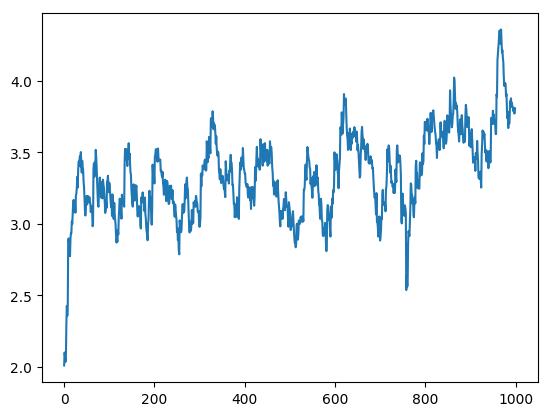

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5dc19eb518>

In [7]:
plot(dm)

In [ ]:
# xnormal = normal_opt(df_train, solver)
# y_pred = pred(df_test, xnormal, robustModel.regressionModel)
# y_true = df_test[:,end]
# r2_score(y_true, y_pred)

In [ ]:
srand(2)
x0 = ones(size(robustModel.descent_direction))
@time xalg, yalg, dm, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
xrobust2 = getsolution(mem, ambiguity, nbfeatures)
y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
y_true = df_test[:,end]
println("1 = ", r2_score(y_true, y_pred1))
println("1 = ", r2_score(y_true, y_pred2))

In [ ]:
plot(dm)

In [ ]:
x_dro = DRO_opt(df_train, ϵ, solver, robustModel.regressionModel)
y_pred = pred(df_test, x_dro, robustModel.regressionModel)
y_true = df_test[:,end]
r2_score(y_true, y_pred)

In [ ]:
x_dro = KL_opt(df_train, 0.1, solver, robustModel.regressionModel)
y_pred = pred(df_test, x_dro, robustModel.regressionModel)
y_true = df_test[:,end]
r2_score(y_true, y_pred)

In [ ]:
aux = []
for ϵ in 0:0.01:1
    println("epsilon = ", ϵ)
    robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
    x_dro = DRO_opt(df_train, ϵ, solver, robustModel.regressionModel)
    y_pred = pred(df_test, x_dro, robustModel.regressionModel)
    y_true = df_test[:,end]
    push!(aux, r2_score(y_true, y_pred))
end
println("min = ", minimum(aux))
plot(aux)

In [ ]:
bux = []
for ϵ in 0:1:100
    println("epsilon = ", ϵ)
    x_dro = DRO_opt(df_train, ϵ, solver, robustModel.regressionModel)
    y_pred = pred(df_test, x_dro, robustModel.regressionModel)
    y_true = df_test[:,end]
    push!(bux, r2_score(y_true, y_pred))
end
println("min = ", minimum(bux))
plot(bux)

In [ ]:
ambiguity = "KLdivergence"

In [ ]:
cux = []
for ϵ in 0:0.01:1
    println("epsilon = ", ϵ)
    robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
    x_dro = KL_opt(df_train, ϵ, solver, robustModel.regressionModel)
    y_pred = pred(df_test, x_dro, robustModel.regressionModel)
    y_true = df_test[:,end]
    push!(cux, r2_score(y_true, y_pred))
end
println("min = ", minimum(cux))


In [ ]:
x_dro = KL_opt(df_train, 30, solver, robustModel.regressionModel)
y_pred = pred(df_test, x_dro, robustModel.regressionModel)
y_true = df_test[:,end]
r2_score(y_true, y_pred)

In [ ]:
cbis[4]

In [ ]:
dux = []
for ϵ in 0:1:100
    println("epsilon = ", ϵ)
    x_dro = KL_opt(df_train, ϵ, solver, robustModel.regressionModel)
    y_pred = pred(df_test, x_dro, robustModel.regressionModel)
    y_true = df_test[:,end]
    push!(dux, r2_score(y_true, y_pred))
end
println("min = ", minimum(dux))
plot(dux)

In [ ]:
# @sk_import linear_model: LinearRegression
# model = LinearRegression(fit_intercept=true)
# model = fit!(LinearRegression(), df_train[:,1:end-1], df_train[:,end])
# ypred = predict(model, df_test[:,1:end-1],)
# y_true = df_test[:,end]
# r2_score(y_true, y_pred)

In [ ]:
xnormal